In [1]:
%load_ext autoreload
%autoreload 2

from tqdm.auto import tqdm
import terra
import numpy as np
import meerkat as mk
import pandas as pd
import ray
from tqdm.auto import tqdm

In [2]:
from domino.data.celeb import build_celeb_df, build_celeb_dp

if False:
    df = build_celeb_df().load()
else:
    df = build_celeb_df.out(504)
dp = build_celeb_dp.out(542, load=True)

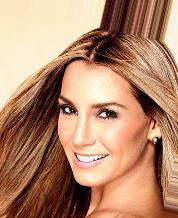

In [3]:
dp["img"][0]

In [42]:
df = terra.out(691).load()
df

,target,correlate,corr,num_examples,run_id,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,...,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,trial_id,config/corr,config/target_correlate,logdir
0,male,smiling,0.0,30000.0,694,708.509146,False,NaN,NaN,1,...,24613,pod-sabri-t4-4,10.92.5.4,708.509146,0,1,8a3f0_00000,0.0,"['male', 'smiling']",/root/ray_results/_train_model_2021-06-29_07-2...
1,male,smiling,0.1,30000.0,693,726.495500,False,NaN,NaN,1,...,24612,pod-sabri-t4-4,10.92.5.4,726.495500,0,1,8a3f0_00001,0.1,"['male', 'smiling']",/root/ray_results/_train_model_2021-06-29_07-2...
2,male,smiling,0.2,30000.0,692,739.591141,False,NaN,NaN,1,...,24616,pod-sabri-t4-4,10.92.5.4,739.591141,0,1,8a3f0_00002,0.2,"['male', 'smiling']",/root/ray_results/_train_model_2021-06-29_07-2...
3,male,smiling,0.3,30000.0,695,733.769021,False,NaN,NaN,1,...,24609,pod-sabri-t4-4,10.92.5.4,733.769021,0,1,8a3f0_00003,0.3,"['male', 'smiling']",/root/ray_results/_train_model_2021-06-29_07-2...
4,male,smiling,0.4,30000.0,696,760.407439,False,NaN,NaN,1,...,24615,pod-sabri-t4-4,10.92.5.4,760.407439,0,1,8a3f0_00004,0.4,"['male', 'smiling']",/root/ray_results/_train_model_2021-06-29_07-2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,wearing_necklace,blond_hair,0.4,30000.0,786,772.858852,False,NaN,NaN,1,...,373212,pod-sabri-t4-4,10.92.5.4,772.858852,0,1,8a3f0_00094,0.4,"['wearing_necklace', 'blond_hair']",/root/ray_results/_train_model_2021-06-29_07-2...
95,wearing_necklace,blond_hair,0.5,30000.0,787,816.905568,False,NaN,NaN,1,...,373506,pod-sabri-t4-4,10.92.5.4,816.905568,0,1,8a3f0_00095,0.5,"['wearing_necklace', 'blond_hair']",/root/ray_results/_train_model_2021-06-29_07-2...
96,wearing_necklace,blond_hair,0.6,30000.0,788,741.073604,False,NaN,NaN,1,...,381664,pod-sabri-t4-4,10.92.5.4,741.073604,0,1,8a3f0_00096,0.6,"['wearing_necklace', 'blond_hair']",/root/ray_results/_train_model_2021-06-29_07-2...
97,wearing_necklace,blond_hair,0.7,30000.0,789,745.519187,False,NaN,NaN,1,...,386895,pod-sabri-t4-4,10.92.5.4,745.519187,0,1,8a3f0_00097,0.7,"['wearing_necklace', 'blond_hair']",/root/ray_results/_train_model_2021-06-29_07-2...


In [5]:
df = terra.out(811)
df.load()

,target,correlate,corr,num_examples,run_id,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,...,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,trial_id,config/args,logdir
0,male,smiling,0.0,30000.0,812,40.155520,False,NaN,NaN,1,...,40.155520,445288,pod-sabri-t4-4,10.92.5.4,40.155520,0,1,cd0bb_00000,"{'corr': 0.0, 'correlate': 'smiling', 'num_exa...",/root/ray_results/_score_model_2021-06-29_20-1...
1,male,smiling,0.1,30000.0,813,41.424117,False,NaN,NaN,1,...,41.424117,445290,pod-sabri-t4-4,10.92.5.4,41.424117,0,1,cd0bb_00001,"{'corr': 0.1, 'correlate': 'smiling', 'num_exa...",/root/ray_results/_score_model_2021-06-29_20-1...
2,male,smiling,0.2,30000.0,814,41.246213,False,NaN,NaN,1,...,41.246213,445291,pod-sabri-t4-4,10.92.5.4,41.246213,0,1,cd0bb_00002,"{'corr': 0.2, 'correlate': 'smiling', 'num_exa...",/root/ray_results/_score_model_2021-06-29_20-1...


In [11]:
from domino.evaluate.train import score_linear_slices

In [18]:
score_linear_slices.get_runs()

,id,module,fn,run_dir,status,notebook,start_time,end_time,hostname,python_version,platform,git_commit,git_dirty,slurm_job_id
0,815,domino.evaluate.train,score_linear_slices,/home/sabri/terra/slice/tasks/evaluate/train/s...,success,False,2021-06-29 20:20:59.663531,2021-06-29 20:41:33.225737,pod-sabri-t4-4,"3.8.10 (default, May 19 2021, 18:05:58) \n[GCC...",Linux-5.4.89+-x86_64-with-glibc2.10,11477b5fe1a9b4ac8ee284a4bcf6244b778d5e10,True,None
1,811,domino.evaluate.train,score_linear_slices,/home/sabri/terra/slice/tasks/evaluate/train/s...,success,False,2021-06-29 20:15:46.597411,2021-06-29 20:16:36.143824,pod-sabri-t4-4,"3.8.10 (default, May 19 2021, 18:05:58) \n[GCC...",Linux-5.4.89+-x86_64-with-glibc2.10,11477b5fe1a9b4ac8ee284a4bcf6244b778d5e10,True,None
2,807,domino.evaluate.train,score_linear_slices,/home/sabri/terra/slice/tasks/evaluate/train/s...,failure,False,2021-06-29 20:14:07.997467,2021-06-29 20:14:59.994926,pod-sabri-t4-4,"3.8.10 (default, May 19 2021, 18:05:58) \n[GCC...",Linux-5.4.89+-x86_64-with-glibc2.10,11477b5fe1a9b4ac8ee284a4bcf6244b778d5e10,True,None
3,800,domino.evaluate.train,score_linear_slices,/home/sabri/terra/slice/tasks/evaluate/train/s...,failure,False,2021-06-29 20:10:18.031479,2021-06-29 20:12:50.927320,pod-sabri-t4-4,"3.8.10 (default, May 19 2021, 18:05:58) \n[GCC...",Linux-5.4.89+-x86_64-with-glibc2.10,11477b5fe1a9b4ac8ee284a4bcf6244b778d5e10,True,None
4,799,domino.evaluate.train,score_linear_slices,/home/sabri/terra/slice/tasks/evaluate/train/s...,interrupted,False,2021-06-29 20:08:47.137047,2021-06-29 20:08:49.379961,pod-sabri-t4-4,"3.8.10 (default, May 19 2021, 18:05:58) \n[GCC...",Linux-5.4.89+-x86_64-with-glibc2.10,11477b5fe1a9b4ac8ee284a4bcf6244b778d5e10,True,None
5,792,domino.evaluate.train,score_linear_slices,/home/sabri/terra/slice/tasks/evaluate/train/s...,interrupted,False,2021-06-29 20:07:17.366761,2021-06-29 20:07:53.636713,pod-sabri-t4-4,"3.8.10 (default, May 19 2021, 18:05:58) \n[GCC...",Linux-5.4.89+-x86_64-with-glibc2.10,11477b5fe1a9b4ac8ee284a4bcf6244b778d5e10,True,None


In [7]:
terra.out(812)[0].load()

,file (NumpyArrayColumn),male (NumpyArrayColumn),smiling (NumpyArrayColumn),output (ClassificationOutputColumn),index (ListColumn)
0,182638.jpg,0,1,torch.Tensor(shape=torch.Size([2])),'182637'
1,182639.jpg,0,0,torch.Tensor(shape=torch.Size([2])),'182638'
2,182640.jpg,0,1,torch.Tensor(shape=torch.Size([2])),'182639'
3,182641.jpg,0,1,torch.Tensor(shape=torch.Size([2])),'182640'
4,182642.jpg,0,1,torch.Tensor(shape=torch.Size([2])),'182641'
...,...,...,...,...,...
19957,202595.jpg,0,0,torch.Tensor(shape=torch.Size([2])),'202594'
19958,202596.jpg,1,1,torch.Tensor(shape=torch.Size([2])),'202595'
19959,202597.jpg,1,1,torch.Tensor(shape=torch.Size([2])),'202596'
19960,202598.jpg,0,1,torch.Tensor(shape=torch.Size([2])),'202597'


In [5]:
out = terra.get_artifacts(696, "best_chkpt", load=True)

/home/common/envs/conda/envs/domino/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [7]:
from domino.vision import predict

In [37]:
test_dp = predict(out["model"], dp.lz[dp["split"].data == "valid"], batch_size=128)

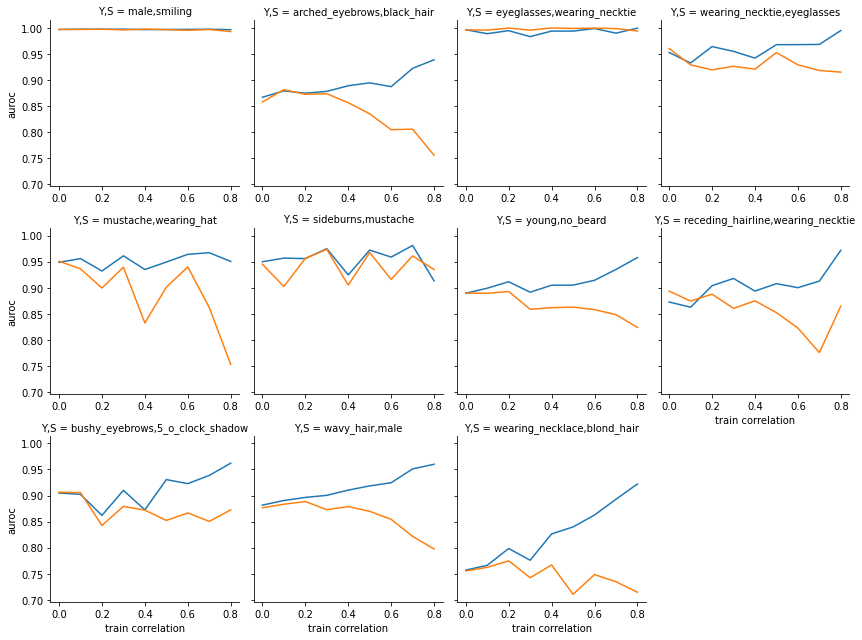

In [48]:
df = terra.out(917).load()
import seaborn as sns
g = sns.FacetGrid(df, col="Y,S",  col_wrap=4, hue="test correlation", sharex=False)
g.map(sns.lineplot, "train correlation", "auroc")

In [32]:
df

,auroc,test_corr,target,correlate,train_corr,"target,correlate"
0,0.995805,0.0,male,smiling,0.0,"male,smiling"
1,0.997480,0.0,male,smiling,0.0,"male,smiling"
2,0.996405,0.1,male,smiling,0.1,"male,smiling"
3,0.994682,0.0,male,smiling,0.1,"male,smiling"
4,0.995540,0.2,male,smiling,0.2,"male,smiling"
...,...,...,...,...,...,...
193,0.764827,0.0,wearing_necklace,blond_hair,0.6,"wearing_necklace,blond_hair"
194,0.908908,0.7,wearing_necklace,blond_hair,0.7,"wearing_necklace,blond_hair"
195,0.738129,0.0,wearing_necklace,blond_hair,0.7,"wearing_necklace,blond_hair"
196,0.916757,0.8,wearing_necklace,blond_hair,0.8,"wearing_necklace,blond_hair"


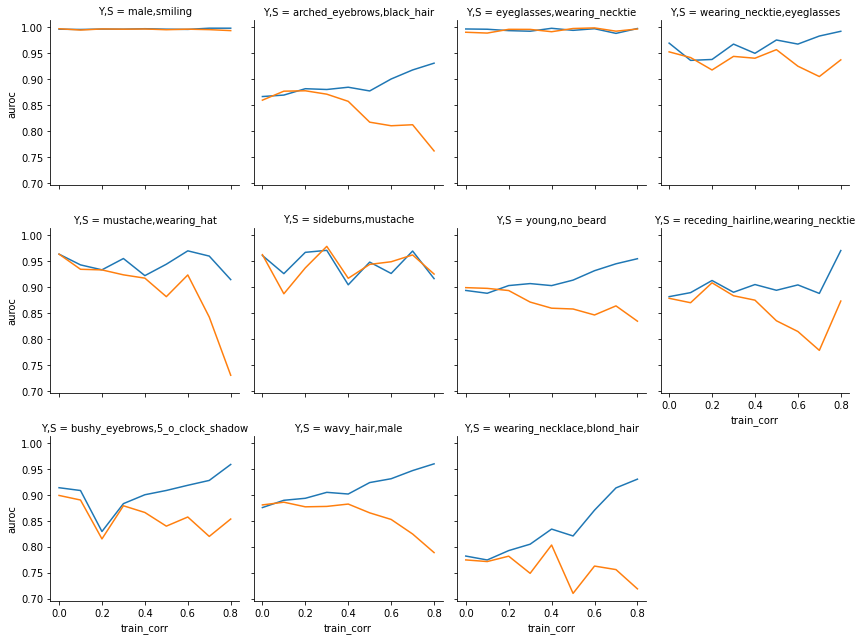

In [37]:
import seaborn as sns
g = sns.FacetGrid(df, col="Y,S",  col_wrap=4, hue="test_corr")
g.map(sns.lineplot, "train correlation", "auroc")

In [24]:
dp["img"].lz[dp["split"].data == "test"]

,(ImageColumn)
182637,ImagePathCell(/home/common/datasets/celeba/img...
182638,ImagePathCell(/home/common/datasets/celeba/img...
182639,ImagePathCell(/home/common/datasets/celeba/img...
182640,ImagePathCell(/home/common/datasets/celeba/img...
182641,ImagePathCell(/home/common/datasets/celeba/img...
...,...
202594,ImagePathCell(/home/common/datasets/celeba/img...
202595,ImagePathCell(/home/common/datasets/celeba/img...
202596,ImagePathCell(/home/common/datasets/celeba/img...
202597,ImagePathCell(/home/common/datasets/celeba/img...


In [32]:
test_dp["img"]._data.reset_index(drop=True)

0        /home/common/datasets/celeba/img_align_celeba/...
1        /home/common/datasets/celeba/img_align_celeba/...
2        /home/common/datasets/celeba/img_align_celeba/...
3        /home/common/datasets/celeba/img_align_celeba/...
4        /home/common/datasets/celeba/img_align_celeba/...
                               ...                        
19957    /home/common/datasets/celeba/img_align_celeba/...
19958    /home/common/datasets/celeba/img_align_celeba/...
19959    /home/common/datasets/celeba/img_align_celeba/...
19960    /home/common/datasets/celeba/img_align_celeba/...
19961    /home/common/datasets/celeba/img_align_celeba/...
Length: 19962, dtype: object